<a href="https://colab.research.google.com/github/trkkvsn06/global-warming/blob/master/K%C3%BCresel_Is%C4%B1nma_Veri_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/trkkvsn06/njfet/master/temperature-anomaly.csv")
data

,Entity,Code,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301
...,...,...,...,...,...,...
671,Tropics,NaN,2014,0.516,0.562,0.472
672,Tropics,NaN,2015,0.737,0.781,0.690
673,Tropics,NaN,2016,0.763,0.806,0.713
674,Tropics,NaN,2017,0.563,0.607,0.514


In [0]:
data = data.drop("Code",axis=1)

In [0]:
data.Entity.value_counts()

Tropics                169
Global                 169
Northern Hemisphere    169
Southern Hemisphere    169
Name: Entity, dtype: int64

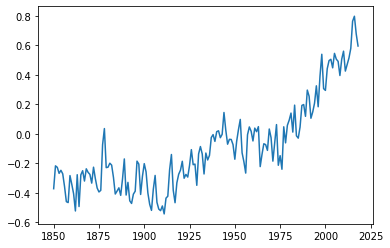

In [0]:
plt.plot(data[data["Entity"] == "Global"]["Year"],data[data["Entity"] == "Global"]["Median (℃)"])

In [0]:
data[(data["Entity"] == "Global") & (data["Year"] == 1955) ]

,Entity,Year,Median (℃),Upper (℃),Lower (℃)
105,Global,1955,-0.19,-0.16,-0.222


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      676 non-null    object 
 1   Year        676 non-null    int64  
 2   Median (℃)  676 non-null    float64
 3   Upper (℃)   676 non-null    float64
 4   Lower (℃)   676 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 26.5+ KB


In [0]:
data.describe()

,Year,Median (℃),Upper (℃),Lower (℃)
count,676.000000,676.000000,676.000000,676.000000
mean,1934.000000,-0.085948,-0.046824,-0.132722
std,48.821368,0.302902,0.300105,0.311442
min,1850.000000,-0.668000,-0.630000,-0.777000
25%,1892.000000,-0.302500,-0.265000,-0.358250
50%,1934.000000,-0.144500,-0.108500,-0.192000
75%,1976.000000,0.065000,0.089750,0.035000
max,2018.000000,1.064000,1.096000,1.027000


In [0]:
data1 = pd.read_csv("https://raw.githubusercontent.com/trkkvsn06/global-warming/master/co2-concentration-long-term.csv")
data1

,Entity,Code,Year,CO₂ concentration (parts per million)
0,World,OWID_WRL,803719 BCE,207.29
1,World,OWID_WRL,803182 BCE,202.23
2,World,OWID_WRL,802573 BCE,204.86
3,World,OWID_WRL,802060 BCE,207.50
4,World,OWID_WRL,801975 BCE,202.92
...,...,...,...,...
1866,World,OWID_WRL,2014,398.65
1867,World,OWID_WRL,2015,400.83
1868,World,OWID_WRL,2016,404.24
1869,World,OWID_WRL,2017,406.55


In [0]:
data1 = data1.drop("Code",axis=1)

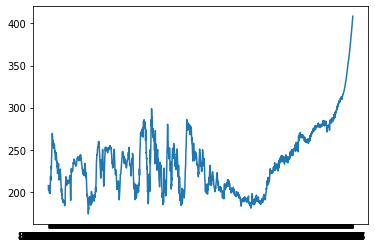

In [0]:
plt.plot(data1["Year"],data1["CO₂ concentration (parts per million)"])
#eksenlere isim verilecek (y - serbest atmosferik CO2 - ppm)
#x eksenindeki aralık düzeltilecek BCE 803719
#ölçeklendirme yapılacak

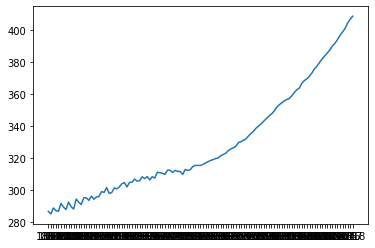

In [0]:
after1850 = data1[1750::]
plt.plot(after1850["Year"],after1850["CO₂ concentration (parts per million)"])

In [0]:
data2 = pd.read_csv("https://raw.githubusercontent.com/trkkvsn06/global-warming/master/co2-fossil-global.csv")
data2

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [0]:
data2 = data2.drop("Gas Flaring" and "Cement",axis=1)

In [0]:
after1850 = data2[data2["Year"] >= 1850]
after1850

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Gas Flaring,Per Capita
99,1850,54,0,0,54,0,NaN
100,1851,54,0,0,54,0,NaN
101,1852,57,0,0,57,0,NaN
102,1853,59,0,0,59,0,NaN
103,1854,69,0,0,69,0,NaN
...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,61,1.27
256,2007,8566,1572,3081,3464,68,1.28
257,2008,8783,1631,3122,3571,71,1.30
258,2009,8740,1585,3056,3620,66,1.28


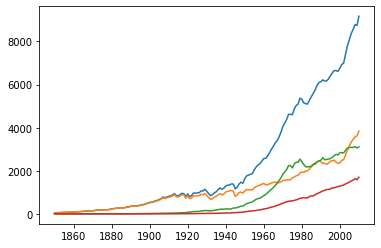

In [0]:
plt.plot(after1850["Year"],after1850["Total"],after1850["Year"],after1850["Solid Fuel"],
         after1850["Year"],after1850["Liquid Fuel"],after1850["Year"],after1850["Gas Fuel"])
#sarı-katı,yeşil-sıvı,kırmızı-gaz
#y ekseni milyon metrik ton karbon
#bunları bar grafiği ile yap

In [0]:
data3 = pd.read_csv("https://raw.githubusercontent.com/trkkvsn06/global-warming/master/%C3%BClkelere%20g%C3%B6re%20yak%C4%B1n%20zaman.csv")
data3

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [0]:
abd_2017 = data3[(data3["Code"] == "USA") & (data3["Year"] == 2017)]["Annual CO₂ emissions (tonnes)"]
china_2017 = data3[(data3["Entity"] == "China") & (data3["Year"] == 2017) ]["Annual CO₂ emissions (tonnes)"]
russia_2017 = data3[(data3["Entity"] == "Russia") & (data3["Year"] == 2017) ]["Annual CO₂ emissions (tonnes)"]
japan_2017 = data3[(data3["Entity"] == "Japan") & (data3["Year"] == 2017) ]["Annual CO₂ emissions (tonnes)"]
Turkey_2017 = data3[(data3["Entity"] == "Turkey") & (data3["Year"] == 2017) ]["Annual CO₂ emissions (tonnes)"]
India_2017 = data3[(data3["Entity"] == "India") & (data3["Year"] == 2017) ]["Annual CO₂ emissions (tonnes)"]
EU_2017 = data3[(data3["Entity"] == "EU-28") & (data3["Year"] == 2017)]["Annual CO₂ emissions (tonnes)"]
yil = data3[(data3["Year"] == 2017)]
yil["Annual CO₂ emissions (tonnes)"]
Digerleri = abd_2017*(39.63/13.7)
print(Digerleri)


19927    1.524317e+10
Name: Annual CO₂ emissions (tonnes), dtype: float64


Text(0.5, 1.0, '2017 yılında atmosfere salınan CO2 oranları')

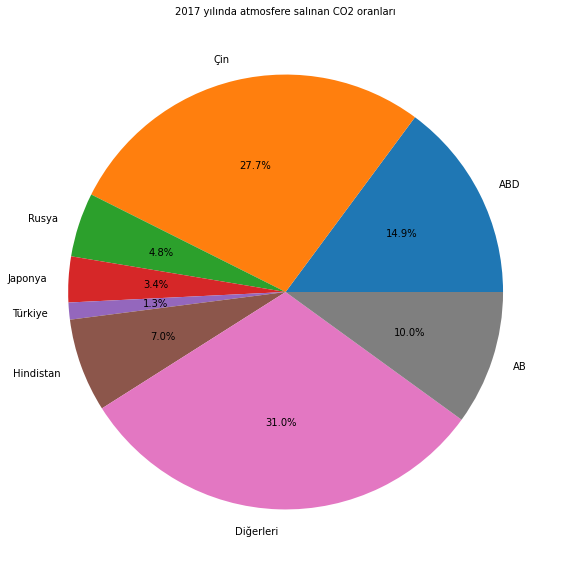

In [0]:
plt.figure(figsize=(10,10))
plt.pie([abd_2017,china_2017,russia_2017,japan_2017,Turkey_2017,India_2017,11000000000,EU_2017],
        labels=["ABD","Çin","Rusya",
                "Japonya","Türkiye","Hindistan","Diğerleri","AB"],autopct='%1.1f%%')
plt.rc(['xtick','ytick'], labelsize=10)
plt.title("2017 yılında atmosfere salınan CO2 oranları", fontsize=10)

In [0]:
abd = sum(data3[(data3["Code"] == "USA")]["Annual CO₂ emissions (tonnes)"])
cin = sum(data3[(data3["Entity"] == "China")]["Annual CO₂ emissions (tonnes)"])
rusya = sum(data3[(data3["Entity"] == "Russia")]["Annual CO₂ emissions (tonnes)"])
japonya = sum(data3[(data3["Entity"] == "Japan")]["Annual CO₂ emissions (tonnes)"])
AB = sum(data3[(data3["Entity"] == "EU-28")]["Annual CO₂ emissions (tonnes)"])
Hindistan = sum(data3[data3["Entity"] == "India"]["Annual CO₂ emissions (tonnes)"])
Turkiye = sum(data3[data3["Entity"] == "Turkey"]["Annual CO₂ emissions (tonnes)"])
Toplam = abd + cin + rusya + japonya + AB + Hindistan + Turkiye
Diger = sum(data3["Annual CO₂ emissions (tonnes)"]) - 3.08*Toplam
Diger

411552474056.6045

Text(0.5, 1.0, 'Atmosferdeki serbest CO2 oranları')

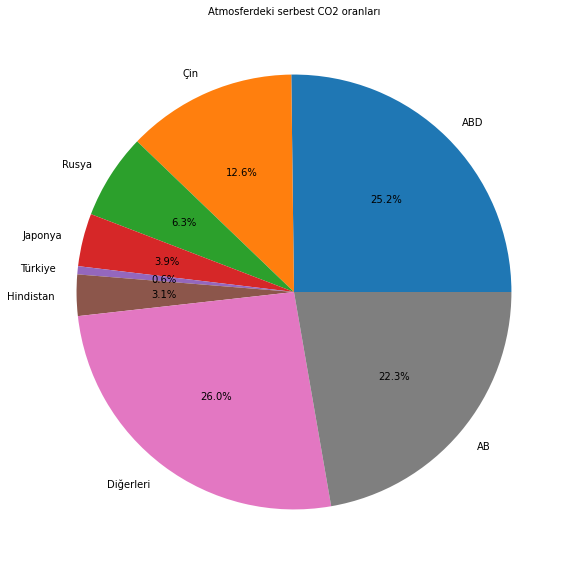

In [0]:
plt.figure(figsize=(10,10))
plt.pie([abd,cin,rusya,japonya,Turkiye,Hindistan,Diger,AB],
        labels=["ABD","Çin","Rusya",
                "Japonya","Türkiye","Hindistan","Diğerleri","AB"],autopct='%1.1f%%')
plt.rc(['xtick','ytick'], labelsize=10)
plt.title("Atmosferdeki serbest CO2 oranları", fontsize=10)

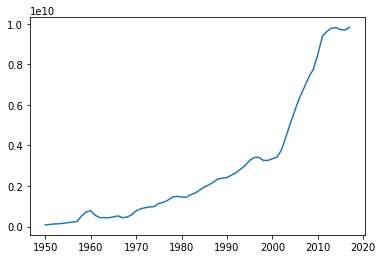

In [0]:
cin = data3[(data3["Entity"] == "China") & (data3["Year"] >= 1950)]
plt.plot(cin["Year"],cin["Annual CO₂ emissions (tonnes)"])

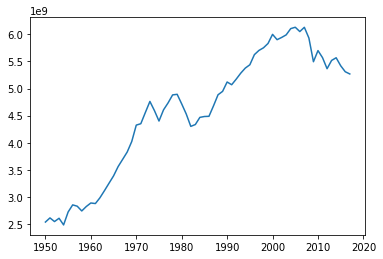

In [0]:
ABD = data3[(data3["Code"] == "USA") & (data3["Year"] >= 1950)]
plt.plot(ABD["Year"],ABD["Annual CO₂ emissions (tonnes)"])

In [0]:
data_glaicer = pd.read_csv("https://raw.githubusercontent.com/trkkvsn06/global-warming/master/kutup%20alan%C4%B1.csv")
data_glaicer

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.000,NaN
1,1946,-1.130,1.0
2,1947,-3.190,1.0
3,1948,-3.190,1.0
4,1949,-3.820,3.0
...,...,...,...
65,2010,-25.158,37.0
66,2011,-26.294,37.0
67,2012,-26.930,36.0
68,2013,-27.817,31.0


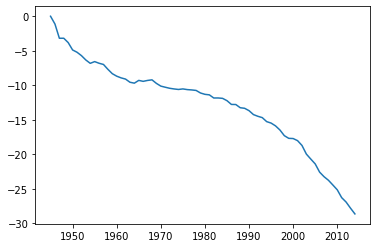

In [0]:
plt.plot(data_glaicer["Year"],data_glaicer["Mean cumulative mass balance"])

In [0]:
data_sealevel = pd.read_csv("https://raw.githubusercontent.com/trkkvsn06/global-warming/master/deniz%20seviyesi.csv")
data_sealevel

,Time,GMSL
0,1993-01-15,-1.6
1,1993-02-15,-3.4
2,1993-03-15,5.5
3,1993-04-15,0.1
4,1993-05-15,5.3
...,...,...
261,2014-10-15,71.7
262,2014-11-15,69.0
263,2014-12-15,76.0
264,2015-01-15,74.5


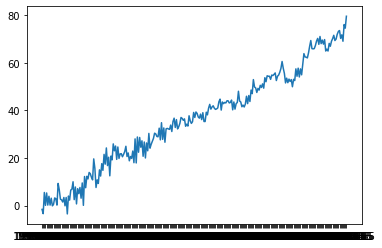

In [0]:
plt.plot(data_sealevel["Time"],data_sealevel["GMSL"])
#eksenleri adlandır ,ölçeklendir

In [0]:
abd_aft2014 = sum(data3[(data3["Code"] == "USA") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])
Cin_aft2014 = sum(data3[(data3["Entity"] == "China") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])
AB_aft2014 = sum(data3[(data3["Entity"] == "EU-28") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])
Hindistan_aft2014 = sum(data3[(data3["Entity"] == "India") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])
rusya_aft2014 = sum(data3[(data3["Entity"] == "Russia") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])
japonya_aft2014 = sum(data3[(data3["Entity"] == "Japan") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])
Turkiye_aft2014 = sum(data3[(data3["Entity"] == "Turkey") & (data3["Year"] >= 2014)]["Annual CO₂ emissions (tonnes)"])

Text(0.5, 1.0, 'Ülkelerin CO2 salımları')

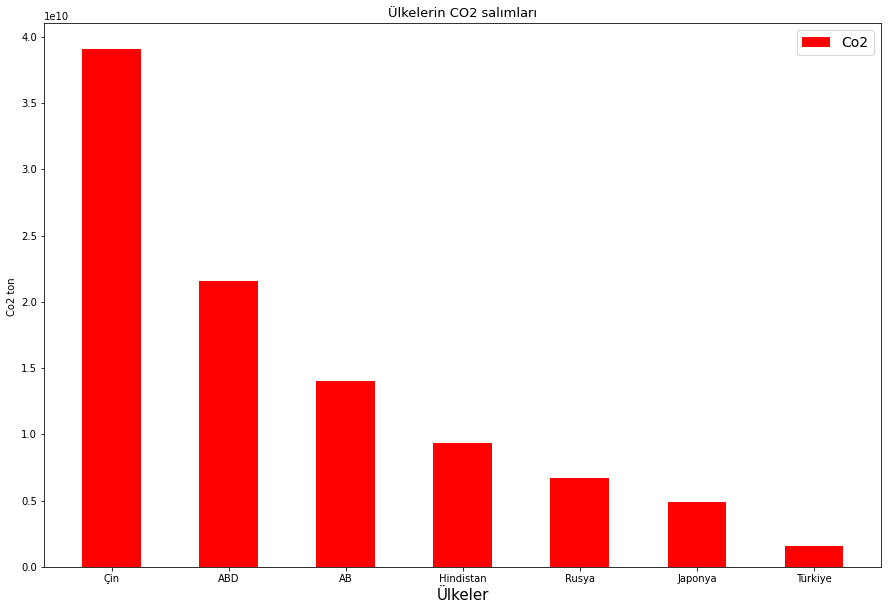

In [0]:
data_by_emmision =[Cin_aft2014,abd_aft2014,AB_aft2014,Hindistan_aft2014,rusya_aft2014,japonya_aft2014,Turkiye_aft2014]
plt.figure(figsize=(15,10))
plt.bar(["Çin" ,"ABD","AB","Hindistan","Rusya","Japonya","Türkiye"],
        data_by_emmision,width=0.5,color="red",label="Co2")
plt.ylabel("Co2 ton ", fontsize = 10)
plt.xlabel("Ülkeler", fontsize = 15)
plt.legend(fontsize=14)
plt.title("Ülkelerin CO2 salımları",fontsize = 13)